In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
# for plot styling
import seaborn as sns; sns.set() # applies Seaborn's default styling to all plots.
import numpy as np


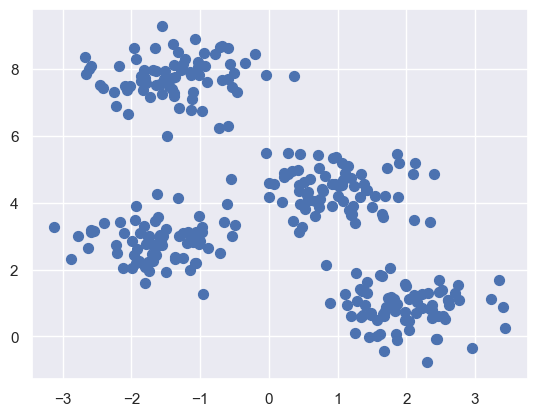

In [4]:
from sklearn.datasets import make_blobs #Generates isotropic Gaussian blobs for clustering.

'''
n_samples=300: Creates 300 data points.
centers=4: Specifies 4 cluster centers.
cluster_std=0.60: Controls the spread of clusters; lower values create tighter clusters.
random_state=0: Ensures reproducibility by fixing the random seed.
'''
X, y_true = make_blobs (n_samples=300, centers=4, cluster_std=0.60, random_state=0) 
plt.scatter (X[:, 0], X[:, 1], s=50);

In [6]:
# assign four clusters
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\USER-22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER-22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [7]:
y_kmeans

array([1, 3, 2, 3, 1, 1, 0, 2, 3, 3, 0, 3, 2, 3, 1, 2, 2, 1, 0, 0, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 1, 2, 0, 2, 2,
       0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 3, 2, 3, 0, 0, 0,
       3, 1, 3, 0, 2, 0, 3, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 1, 3, 2, 1, 2,
       3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 2, 0, 3, 1, 3, 1, 2, 1, 1, 2, 3, 2,
       0, 0, 1, 3, 1, 2, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0,
       0, 1, 3, 0, 0, 3, 2, 3, 3, 0, 2, 0, 2, 0, 3, 2, 3, 3, 3, 2, 3, 2,
       1, 0, 3, 0, 1, 2, 3, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 3, 1, 2, 0, 3,
       1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 3, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 3, 2, 0, 1, 0, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 3, 0, 0, 1, 1, 2,
       3, 1, 1, 0, 1, 0, 2, 3, 3, 2, 2, 3, 2, 1, 0, 2, 1, 0, 3, 0, 1, 2,
       1, 3, 3, 3, 3, 0, 0, 3, 2, 0, 1, 2, 0, 0, 0, 1, 1, 3, 2, 2, 0, 1,
       3, 0, 2, 3, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 1,
       3, 0, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 0])

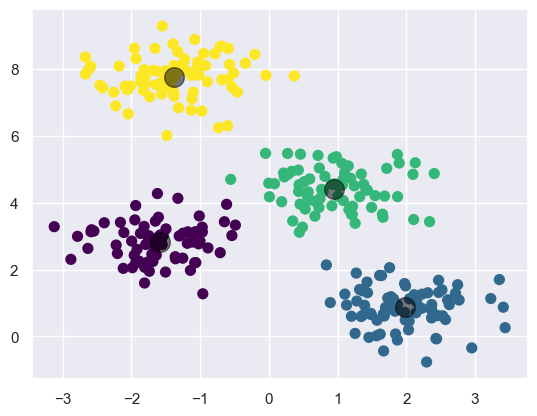

In [8]:
# import library
from sklearn.metrics import pairwise_distances_argmin 
#pairwise_distances_argmin:Computes the index of the nearest cluster center for each data point.

def find_clusters(X, n_clusters, rseed=2):
    '''
    i = rng.permutation (X.shape[0])[:n_clusters]:
    This line of code is used to randomly select initial cluster centers from the dataset X in the find_clusters function.
    rng.permutation(X.shape[0]):
    Generates a random permutation (shuffled sequence) of integers from 0 to X.shape[0] - 1
    [:n_clusters]:
    Slices the first n_clusters elements from the shuffled sequence.
    This selects n_clusters unique indices corresponding to the rows of X
    '''
    # 1. randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation (X.shape[0])[:n_clusters]
    centers =X[i]
 
    while True: 
        '''
        Assigns each data point to the nearest cluster center.
        Updates the cluster centers based on the mean position of all points in each cluster.
        Stops iterating when the cluster centers no longer change.
        '''   
        # 2a. assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. find new centers from means of points
        new_centers = np.array([X[labels==i].mean(0) for i in range (n_clusters)])   
        
        # 2c. check for convergence 
        if np.all(centers== new_centers):
                  break
        centers = new_centers      
        
    return centers, labels  

'''
find_clusters returns:
centers: Coordinates of the cluster centers.
labels: Array of cluster labels assigned to each data point in X.

c=y_kmeans specifies the color of each point, based on the clustering labels (y_kmeans)

cmap='viridis': Color map for the clusters

alpha=0.5: Makes the points semi-transparent
'''
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);